## Import

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

## Data

column names are not defined, code them manually

In [2]:
columns = ["symboling",
           "normalized-losses",
           "make",
           "fuel-type",
           "aspiration",
           "num-of-doors",
           "body-style",
           "drive-wheels",
           "engine-location",
           "wheel-base",
           "length",
           "width",
           "height",
           "curb-weight",
           "engine-type",
           "num-of-cylinders",
           "engine-size",
           "fuel-system",
           "bore",
           "stroke",
           "compression-ratio",
           "horsepower",
           "peak-rpm",
           "city-mpg",
           "highway-mpg",
           "price"
          ]

In [3]:
df = pd.read_csv("imports-85.data", header=None, names=columns)

In [4]:
l_enc = LabelEncoder()

#### EDA

In [5]:
df.shape

(205, 26)

In [6]:
df.sample(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
180,-1,90,toyota,gas,std,four,sedan,rwd,front,104.5,...,171,mpfi,3.27,3.35,9.20,156,5200,20,24,15690
132,3,150,saab,gas,std,two,hatchback,fwd,front,99.1,...,121,mpfi,3.54,3.07,9.31,110,5250,21,28,11850
107,0,161,peugot,gas,std,four,sedan,rwd,front,107.9,...,120,mpfi,3.46,3.19,8.40,97,5000,19,24,11900
171,2,134,toyota,gas,std,two,hatchback,rwd,front,98.4,...,146,mpfi,3.62,3.50,9.30,116,4800,24,30,11549
168,2,134,toyota,gas,std,two,hardtop,rwd,front,98.4,...,146,mpfi,3.62,3.50,9.30,116,4800,24,30,9639


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

#### Features encoding

let's fix 'normalized-losses'

In [8]:
df[df['normalized-losses']=='?'].count()[0]/df.shape[0]

0.2

'?' is 20% of the column. check other values

In [9]:
df[df['normalized-losses']!='?']['normalized-losses'].astype(int).describe()

count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: normalized-losses, dtype: float64

replace '?' with mean

In [10]:
df['normalized-losses'] = df['normalized-losses'].apply(lambda x: '122' if x == '?' else x).astype(int)

In [11]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


return the number or unique values for each column

In [12]:
df.nunique(axis=0)

symboling              6
normalized-losses     51
make                  22
fuel-type              2
aspiration             2
num-of-doors           3
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            60
peak-rpm              24
city-mpg              29
highway-mpg           30
price                187
dtype: int64

encode binary features

In [13]:
df['fuel-type'] = l_enc.fit_transform(df['fuel-type'])

In [14]:
df['aspiration'] = l_enc.fit_transform(df['aspiration'])

In [15]:
df['engine-location'] = l_enc.fit_transform(df['engine-location'])

check categorial features

In [16]:
df['num-of-doors'].unique()

array(['two', 'four', '?'], dtype=object)

In [17]:
df[df['num-of-doors']!='?']['num-of-doors'].describe()

count      203
unique       2
top       four
freq       114
Name: num-of-doors, dtype: object

In [18]:
df=df.drop(df[df['num-of-doors']=='?'].index)

In [19]:
df['num-of-doors'] = l_enc.fit_transform(df['num-of-doors'])

In [20]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [21]:
df['drive-wheels'] = df['drive-wheels'].apply(lambda x: 1 if x == '4wd' else 0)

In [22]:
df['fuel-system'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [23]:
df['fuel-system'] = df['fuel-system'].apply (lambda x: 1 if x in ['1bbl','2bbl','4bbl'] else 0)

In [24]:
df['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [25]:
ohe = pd.get_dummies(df['body-style'])

In [26]:
df = pd.concat([df, ohe], axis=1).drop(columns=['body-style'])

In [27]:
df['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [28]:
df = df.drop(columns=['make'])

In [29]:
df.sample(3)

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,convertible,hardtop,hatchback,sedan,wagon
56,3,150,1,0,1,0,0,95.3,169.0,65.7,...,101,6000,17,23,11845,0,0,1,0,0
45,0,122,1,0,0,0,0,94.5,155.9,63.6,...,70,5400,38,43,?,0,0,0,1,0
109,0,122,1,0,0,0,0,114.2,198.9,68.4,...,97,5000,19,24,12440,0,0,0,0,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 204
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          203 non-null    int64  
 1   normalized-losses  203 non-null    int32  
 2   fuel-type          203 non-null    int32  
 3   aspiration         203 non-null    int32  
 4   num-of-doors       203 non-null    int32  
 5   drive-wheels       203 non-null    int64  
 6   engine-location    203 non-null    int32  
 7   wheel-base         203 non-null    float64
 8   length             203 non-null    float64
 9   width              203 non-null    float64
 10  height             203 non-null    float64
 11  curb-weight        203 non-null    int64  
 12  engine-type        203 non-null    object 
 13  num-of-cylinders   203 non-null    object 
 14  engine-size        203 non-null    int64  
 15  fuel-system        203 non-null    int64  
 16  bore               203 non

In [31]:
df['engine-type'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [32]:
df['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [33]:
df['num-of-cylinders'] = df['num-of-cylinders'].replace({'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8})

In [34]:
df['bore'].unique()

array(['3.47', '2.68', '3.19', '3.13', '3.50', '3.31', '3.62', '2.91',
       '3.03', '2.97', '3.34', '3.60', '2.92', '3.15', '3.43', '3.63',
       '3.54', '3.08', '?', '3.39', '3.76', '3.58', '3.46', '3.80',
       '3.78', '3.17', '3.35', '3.59', '2.99', '3.33', '3.70', '3.61',
       '3.94', '3.74', '2.54', '3.05', '3.27', '3.24', '3.01'],
      dtype=object)

In [35]:
df[df['bore']=='?']

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,convertible,hardtop,hatchback,sedan,wagon
55,3,150,1,0,1,0,0,95.3,169.0,65.7,...,101,6000,17,23,10945,0,0,1,0,0
56,3,150,1,0,1,0,0,95.3,169.0,65.7,...,101,6000,17,23,11845,0,0,1,0,0
57,3,150,1,0,1,0,0,95.3,169.0,65.7,...,101,6000,17,23,13645,0,0,1,0,0
58,3,150,1,0,1,0,0,95.3,169.0,65.7,...,135,6000,16,23,15645,0,0,1,0,0


In [36]:
df['stroke'].unique()

array(['2.68', '3.47', '3.40', '2.80', '3.19', '3.39', '3.03', '3.11',
       '3.23', '3.46', '3.90', '3.41', '3.07', '3.58', '4.17', '2.76',
       '3.15', '?', '3.16', '3.64', '3.10', '3.35', '3.12', '3.86',
       '3.29', '3.27', '3.52', '2.19', '3.21', '2.90', '2.07', '2.36',
       '2.64', '3.08', '3.50', '3.54', '2.87'], dtype=object)

In [37]:
df[df['stroke']=='?']

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,convertible,hardtop,hatchback,sedan,wagon
55,3,150,1,0,1,0,0,95.3,169.0,65.7,...,101,6000,17,23,10945,0,0,1,0,0
56,3,150,1,0,1,0,0,95.3,169.0,65.7,...,101,6000,17,23,11845,0,0,1,0,0
57,3,150,1,0,1,0,0,95.3,169.0,65.7,...,101,6000,17,23,13645,0,0,1,0,0
58,3,150,1,0,1,0,0,95.3,169.0,65.7,...,135,6000,16,23,15645,0,0,1,0,0


In [38]:
df = df.drop(df[df['stroke']=='?'].index)

In [39]:
df['bore'] = df['bore'].astype(float)

In [40]:
df['stroke'] = df['stroke'].astype(float)

In [41]:
df = df.drop(df[df['price']=='?'].index)

In [42]:
df['price'] = df['price'].astype(float)

In [43]:
df['horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '101', '121', '182',
       '48', '70', '68', '88', '145', '58', '76', '60', '86', '100', '78',
       '90', '176', '262', '84', '120', '72', '123', '155', '184', '175',
       '116', '69', '55', '97', '152', '160', '200', '95', '142', '143',
       '207', '?', '73', '82', '94', '62', '56', '112', '92', '161',
       '156', '52', '85', '114', '162', '134', '106'], dtype=object)

In [44]:
df[df['horsepower'] == '?']

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,convertible,hardtop,hatchback,sedan,wagon
130,0,122,1,0,0,0,0,96.1,181.5,66.5,...,?,?,23,31,9295.0,0,0,0,0,1
131,2,122,1,0,1,0,0,96.1,176.8,66.6,...,?,?,23,31,9895.0,0,0,1,0,0


In [45]:
df = df.drop(df[df['horsepower'] == '?'].index)

In [46]:
df['horsepower'] = df['horsepower'].astype(float)

In [47]:
df['peak-rpm'].unique()

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4200', '4350', '4500', '5200', '4150', '5600', '5900',
       '5250', '4900', '4400', '6600', '5300'], dtype=object)

In [48]:
df['peak-rpm'] = df['peak-rpm'].astype(float)

In [49]:
df['engine-type'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'ohcf'], dtype=object)

In [50]:
ohe =  pd.get_dummies(df['engine-type'])

In [51]:
df = pd.concat([df, ohe], axis=1).drop(columns=['engine-type'])

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    int64  
 1   normalized-losses  193 non-null    int32  
 2   fuel-type          193 non-null    int32  
 3   aspiration         193 non-null    int32  
 4   num-of-doors       193 non-null    int32  
 5   drive-wheels       193 non-null    int64  
 6   engine-location    193 non-null    int32  
 7   wheel-base         193 non-null    float64
 8   length             193 non-null    float64
 9   width              193 non-null    float64
 10  height             193 non-null    float64
 11  curb-weight        193 non-null    int64  
 12  num-of-cylinders   193 non-null    int64  
 13  engine-size        193 non-null    int64  
 14  fuel-system        193 non-null    int64  
 15  bore               193 non-null    float64
 16  stroke             193 non

#### Relationship

<AxesSubplot: xlabel='price'>

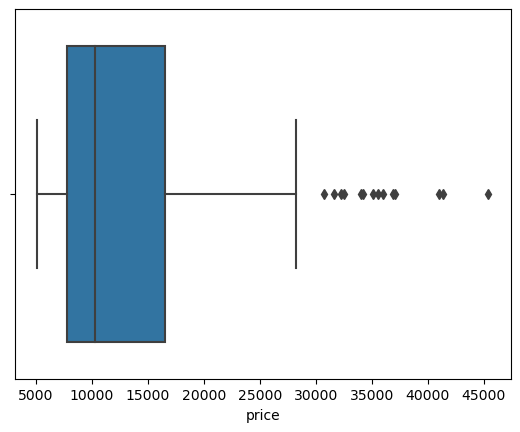

In [53]:
sns.boxplot(x=df['price'])

In [54]:
df = df[df['price'] < 40000]

In [55]:
corr = df.corr()

<AxesSubplot: >

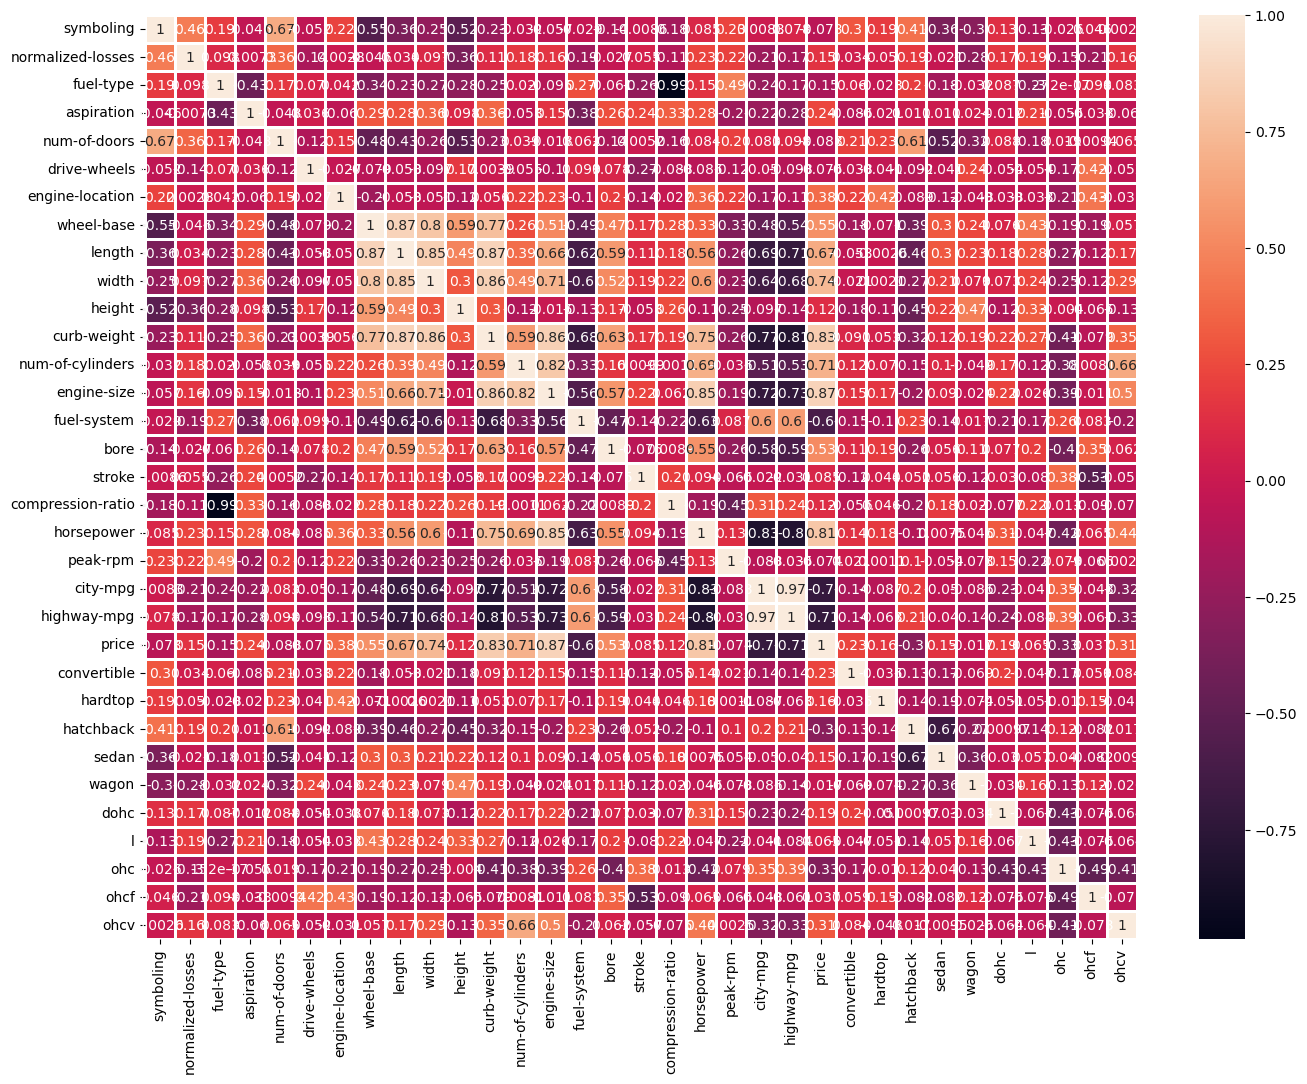

In [56]:
plt.figure(figsize=(16,12))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=1)

In [57]:
#df_corr = df.drop(columns=['wheel-base', 'width','engine-size','city-mpg','highway-mpg','compression-ratio','curb-weight'])
df_corr = df

In [58]:
#corr = df_corr.corr()
#plt.figure(figsize=(18,13))
#sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=1)

In [59]:
#sns.pairplot(df_corr)

## KNNRegressor

In [ ]:
X = df_corr.drop(columns=['price'])
y = df_corr['price']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.17, random_state=12)

In [60]:
# Модель
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
preds_valid = knn.predict(X_valid)

# Тестирование
print(f'MAE={mean_absolute_error(y_valid, preds_valid)}')
print(f'Max error={max_error(y_valid, preds_valid)}')
print(f'MSE={mean_squared_error(y_valid, preds_valid)}')

MAE=1536.232323232323
Max error=7125.333333333334
MSE=6571844.353535354


In [61]:
parameters = {'n_neighbors' : (3, 5, 7, 9), 'weights' : ('uniform','distance')}
model = KNeighborsRegressor(n_jobs=-1)
gsCV = GridSearchCV(model, param_grid=parameters, scoring='neg_mean_absolute_error')
gsCV.fit(X_train, y_train)
gsCV.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': -1,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'distance'}

In [62]:
preds_valid = gsCV.predict(X_valid)

# Тестирование
print(f'MAE={mean_absolute_error(y_valid, preds_valid)}')
print(f'Max error={max_error(y_valid, preds_valid)}')
print(f'MSE={mean_squared_error(y_valid, preds_valid)}')

MAE=1461.0445805167053
Max error=7300.408996912263
MSE=5467688.9136072695


#### StandardScaler

In [63]:
std_scaler = StandardScaler().fit(X_train)
X_train_std = std_scaler.transform(X_train)
X_valid_std = std_scaler.transform(X_valid)

In [64]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train_std, y_train)
preds_valid = knn.predict(X_valid_std)

# Тестирование
print(f'MAE={mean_absolute_error(y_valid, preds_valid)}')
print(f'Max error={max_error(y_valid, preds_valid)}')
print(f'MSE={mean_squared_error(y_valid, preds_valid)}')

MAE=2443.2727272727275
Max error=18023.0
MSE=22614260.35016835


#### GridSearchCV

In [65]:
df_corr.describe()['price']

count      190.000000
mean     12822.815789
std       7251.943667
min       5118.000000
25%       7701.250000
50%      10096.500000
75%      16500.000000
max      37028.000000
Name: price, dtype: float64

## LinearRegressor

In [66]:
#df_corr = df.drop(columns=['wheel-base', 'width','engine-size','city-mpg','highway-mpg','compression-ratio','curb-weight'])

In [67]:
# Модель
lr = LinearRegression()
lr.fit(X_train_std, y_train)
preds_valid = lr.predict(X_valid_std)

# Тестирование
print(f'MAE={mean_absolute_error(y_valid, preds_valid)}')
print(f'Max error={max_error(y_valid, preds_valid)}')
print(f'MSE={mean_squared_error(y_valid, preds_valid)}')

MAE=1893.690896925426
Max error=6545.081710290626
MSE=5857545.424515658


## PCA

In [70]:
for i in [10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]:
    pca = PCA(i).fit(X_train_std)
    X_train_pca = pca.transform(X_train_std)
    X_valid_pca = pca.transform(X_valid_std)
    lr.fit(X_train_pca, y_train)
    preds_valid = lr.predict(X_valid_pca)

    # Тестирование
    print('PCA =',i)
    print(f'MAE = {mean_absolute_error(y_valid, preds_valid)}')
    print(f'Max error = {max_error(y_valid, preds_valid)}')
    print(f'MSE = {mean_squared_error(y_valid, preds_valid)}')

PCA = 10
MAE = 2228.219794542024
Max error = 6423.14243276848
MSE = 6947487.39900089
PCA = 12
MAE = 2214.287937595979
Max error = 6510.029096079477
MSE = 6779230.90868984
PCA = 14
MAE = 2089.0741281607175
Max error = 7765.9257233885255
MSE = 7405901.857861083
PCA = 16
MAE = 1915.358517249471
Max error = 6992.975302717234
MSE = 6483135.6218330115
PCA = 18
MAE = 1869.1719782318012
Max error = 6939.977175962707
MSE = 6150450.158418228
PCA = 20
MAE = 1862.9790847259926
Max error = 8413.505647882033
MSE = 6892591.262139991
PCA = 22
MAE = 1728.4381739908283
Max error = 7422.131226189063
MSE = 5712732.334387475
PCA = 24
MAE = 1783.4280208836913
Max error = 6524.9877680764075
MSE = 5738137.854385182
PCA = 26
MAE = 1912.4508404700825
Max error = 6775.705315167899
MSE = 5979763.968319939
PCA = 28
MAE = 1930.3308948001707
Max error = 6986.966844355848
MSE = 6152232.411052393
PCA = 30
MAE = 1893.6908969254225
Max error = 6545.081710290615
MSE = 5857545.424515639
